<a href="https://colab.research.google.com/github/MariamIsmaeil/Walmart-Sales-Insights/blob/main/Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **⇒ About Dataset**

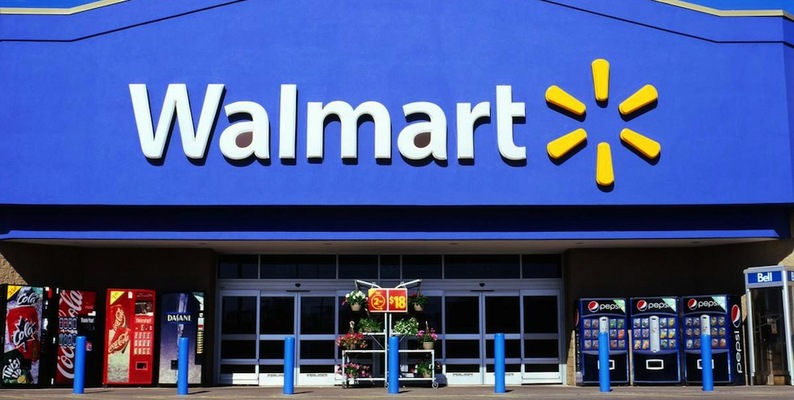

*Problem* :   
There are many seasons that sales are significantly higher or lower than averages. If the company does not know about these seasons, it can lose too much money. Predicting future sales is one of the most crucial plans for a company. Sales forecasting gives an idea to the company for arranging stocks, calculating revenue, and deciding to make a new investment. Another advantage of knowing future sales is that achieving predetermined targets from the beginning of the seasons can have a positive effect on stock prices and investors' perceptions. Also, not reaching the projected target could significantly damage stock prices, conversely. And, it will be a big problem especially for Walmart as a big company.

**Aim** :   
My aim in this project is to build a model which predicts sales of the stores. With this model, Walmart authorities can decide their future plans which is very important for arranging stocks, calculating revenue and deciding to make new investment or not.

**Findings** :  
Although some departments has higher sales, on average others can be best. It shows us, some departments has effect on sales on some seasons like Thanksgiving.
It is same for stores, means that some areas has higher seasonal sales.
Stores has 3 types as A, B and C according to their sizes. Almost half of the stores are bigger than 150000 and categorized as A. According to type, sales of the stores are changing.
As expected, holiday average sales are higher than normal dates.
Top 4 sales belongs to Christmas, Thankgiving and Black Friday times. Interestingly, 22th week of the year is the 5th best sales. It is end of May and the time when schools are closed.
Christmas holiday introduces as the last days of the year. But people generally shop at 51th week. So, when we look at the total sales of holidays, Thankgiving has higher sales between them which was assigned by Walmart. But, when we look at the data we can understand it is not a good idea to assign Christmas sales in data to last days of the year. It must assign 51th week.
January sales are significantly less than other months. This is the result of November and December high sales. After two high sales month, people prefer to pay less on January.
CPI, temperature, unemployment rate and fuel price have no pattern on weekly sales.

# **⇒ Import Python Libraries**

In [ ]:
# Import Important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **⇒ Reading Dataset**

In [ ]:
# train data
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/walmart dataset/train.csv')
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
features = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/walmart dataset/features.csv')
features.head()
# external information

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
stores = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/walmart dataset/stores.csv')
stores.head()
# store data

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
# First Look to Data and Merging Three Dataframes
data = pd.merge(train,features,on=['Store','Date'],how='inner').merge(stores,on='Store',how='inner')
pd.concat([data.head(),data.tail()])

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False,B,118221
421569,45,98,2012-10-26,1076.80,False,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,B,118221


In [ ]:
# Take a copy of the data to make modifications to it .
df = data.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday_y   421570 non-null  bool   
 15  Type          421570 non-null  object 
 16  Size          421570 non-null  int64  
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000
MarkDown5,151432.0,4628.975079,5962.887455,135.160,1878.440000,3359.45000,5563.800000,108519.280000


In [ ]:
df.describe(include='object')

,Date,Type
count,421570,421570
unique,143,3
top,2011-12-23,A
freq,3027,215478


In [ ]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size'],
      dtype='object')

There are two columns  'IsHoliday_x' , 'IsHoliday_y' so we will delete one of them.

In [ ]:
df.drop('IsHoliday_x',axis=1,inplace=True)
df.rename(columns={'IsHoliday_y':'IsHoliday'},inplace=True)
df.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [ ]:
df['Store'].nunique()

45

In [ ]:
df['Dept'].nunique()

81

We have 45 stores, each store has 81 departments.

In [ ]:
stor_dept_table = pd.pivot_table(df,index='Store',columns='Dept' ,values='Weekly_Sales', aggfunc='mean')
stor_dept_table

Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,...,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,...,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,...,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,...,89248.965524,66535.407203,159365.107902,67815.163007,68159.106573,147236.473706,38346.573077,39339.238951,15009.249371,623.182381
5,9774.553077,12317.953287,4101.085175,9860.806783,6699.202238,1191.057622,6124.484336,13735.709441,7919.805944,9783.395385,...,3059.520000,1457.221678,7759.205594,NaN,411.431486,19340.693986,5985.671119,667.070315,29.976087,NaN
6,23867.553776,50269.437273,16806.638811,34187.366503,34465.307622,7225.566643,34526.870420,47577.719790,48271.060140,47436.477902,...,53715.366084,45270.405175,99024.796503,41359.651189,41701.693497,89208.786294,30450.542238,20637.667063,9728.100629,388.636750
7,9542.801259,22603.690769,8633.536923,14950.518601,13860.350490,6329.928811,10925.757063,13970.619371,29722.736084,21136.560280,...,13858.405874,10263.880000,26530.890559,1328.178252,699.332522,34208.097273,1123.383217,4374.927902,260.886596,15.000000
8,14789.827343,35729.821748,10683.305105,21089.309301,19838.849231,3395.425455,20268.743776,26438.524336,11792.661678,20666.433776,...,39333.566154,31530.560909,60465.630000,27515.635315,25442.578042,62951.463706,16.986667,16978.366503,6880.466434,298.153714
9,11846.558252,24969.477413,7497.356783,17165.947762,19282.746014,2806.416364,13826.694336,21424.470699,13196.569720,12810.480350,...,2981.249510,869.273287,14123.063147,21.240000,599.112568,29575.050769,3596.107762,372.655556,27.930000,NaN


These are the weekly sales for each store and each department.

In [ ]:
df.loc[df['Weekly_Sales']<0]

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
846,1,6,2012-08-10,-139.65,85.05,3.494,11436.22,245.0,6.85,6964.26,4836.22,221.958433,6.908,False,A,151315
2384,1,18,2012-05-04,-1.27,75.55,3.749,21290.13,NaN,69.89,4977.35,3261.04,221.671800,7.143,False,A,151315
6048,1,47,2010-02-19,-863.00,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
6049,1,47,2010-03-12,-698.00,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False,A,151315
6051,1,47,2010-10-08,-58.00,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,27.73,2.773,NaN,NaN,NaN,NaN,NaN,181.982317,8.992,True,B,118221
419598,45,80,2010-02-19,-0.27,31.27,2.745,NaN,NaN,NaN,NaN,NaN,182.034782,8.992,False,B,118221
419603,45,80,2010-04-16,-1.61,54.28,2.899,NaN,NaN,NaN,NaN,NaN,181.692477,8.899,False,B,118221
419614,45,80,2010-07-02,-0.27,76.61,2.815,NaN,NaN,NaN,NaN,NaN,182.318780,8.743,False,B,118221


We found that there are negative values ​​in the weekly sales and values ​​equal to zero, and this is illogical.

They are only **1285** values ​​out of **421569** so we will delete these values.

In [ ]:
df = df.drop(df.loc[df['Weekly_Sales']<0].index)
df

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,B,118221
421566,45,98,2012-10-05,628.10,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False,B,118221
421567,45,98,2012-10-12,1061.02,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False,B,118221
421568,45,98,2012-10-19,760.01,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False,B,118221


In [ ]:
df.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
Temperature,0
Fuel_Price,0
MarkDown1,270085
MarkDown2,309367
MarkDown3,283618
MarkDown4,285750


It is clear that there are very large empty values ​​in the **MarkDown** columns, so this problem must be solved.         
 When we searched, we found that these columns indicate the presence of a discount, and there are 5 of them to indicate the departments, for example (Markdown1 to indicate the presence of a discount in the meat department). In order to solve this problem, we fill the empty values ​​with **0**, and this is the ideal solution.

In [ ]:
# fill nan value with 0
df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']] = df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)

In [ ]:
df.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0
MarkDown3,0
MarkDown4,0


In [ ]:
df.duplicated().sum()

0

Great! Now we don't have any Nan values and No duplicate .

# ⇒ **Date**

In [ ]:
pd.concat([df['Date'].head(5), df['Date'].tail(5)]) # to see first and last 5 rows.

,Date
0,2010-02-05
1,2010-02-12
2,2010-02-19
3,2010-02-26
4,2010-03-05
421565,2012-09-28
421566,2012-10-05
421567,2012-10-12
421568,2012-10-19
421569,2012-10-26


In [ ]:
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])
# Extract relevant features from the 'Date' column for correlation analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Day'] = df['Date'].dt.day

In [ ]:
df_holiday = df.loc[df['IsHoliday']==True]
df_holiday['Date'].unique()

<DatetimeArray>
['2010-02-12 00:00:00', '2010-09-10 00:00:00', '2010-11-26 00:00:00',
 '2010-12-31 00:00:00', '2011-02-11 00:00:00', '2011-09-09 00:00:00',
 '2011-11-25 00:00:00', '2011-12-30 00:00:00', '2012-02-10 00:00:00',
 '2012-09-07 00:00:00']
Length: 10, dtype: datetime64[ns]

We have some important dates that represent holidays as they are in front of us.

In [ ]:
df_not_holiday = df.loc[df['IsHoliday']==False]
df_not_holiday['Date'].nunique()

133

In [ ]:
# Super bowl dates in train set
Super_Bowl = df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False

In [ ]:
# Labor day dates in train set
Labor_Day = df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False

In [ ]:
# Thanksgiving dates in train set
Thanksgiving =df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False

In [ ]:
#Christmas dates in train set
Christmas = df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False

Therefore, we attributed each date to its appropriate holiday to differentiate between each holiday, as there is 'Christmas' , 'Thanksgiving' , 'Labor_Day' , 'Super_Bowl'


# ⇒ **Feature Engineering**

Feature engineering refers to the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling. The main goal of Feature engineering is to create meaningful data from raw data.

In [ ]:
df['Total_MarkDown'] = df['MarkDown1']+df['MarkDown2']+df['MarkDown3']+df['MarkDown4']+df['MarkDown5']
df.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)
df.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Year,Month,Week,Day,Super_Bowl,Labor_Day,Thanksgiving,Christmas,Total_MarkDown
0,1,1,2010-02-05,24924.50,42.31,2.572,211.096358,8.106,False,A,151315,2010,2,5,5,False,False,False,False,0.0
1,1,1,2010-02-12,46039.49,38.51,2.548,211.242170,8.106,True,A,151315,2010,2,6,12,True,False,False,False,0.0
2,1,1,2010-02-19,41595.55,39.93,2.514,211.289143,8.106,False,A,151315,2010,2,7,19,False,False,False,False,0.0
3,1,1,2010-02-26,19403.54,46.63,2.561,211.319643,8.106,False,A,151315,2010,2,8,26,False,False,False,False,0.0
4,1,1,2010-03-05,21827.90,46.50,2.625,211.350143,8.106,False,A,151315,2010,3,9,5,False,False,False,False,0.0


# **⇒ EDA Univariate Analysis**

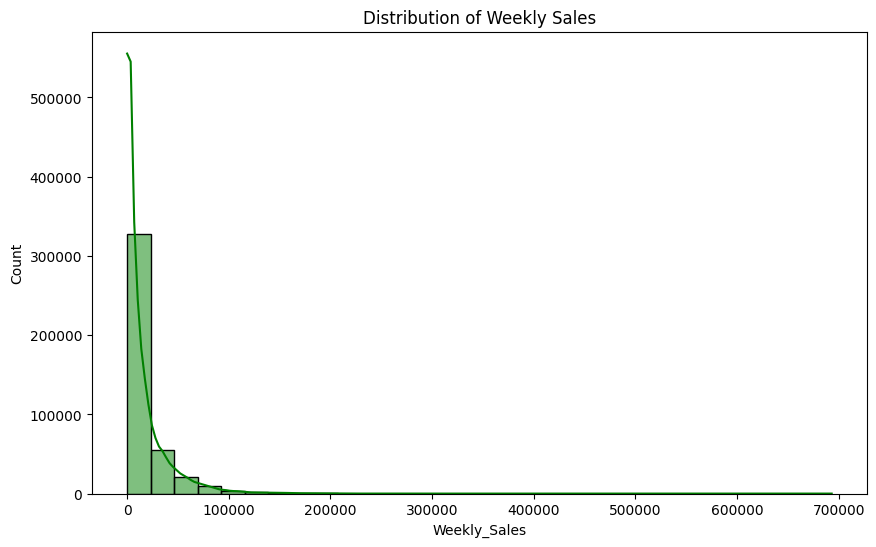

Skew : 3.259108889879835


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Weekly_Sales'], bins=30, kde=True, color='green')
plt.title('Distribution of Weekly Sales')
plt.show()
print(f"Skew : {df['Weekly_Sales'].skew()}")

Weekly Sales distribution is right-skewed, meaning most sales are lower with few high sales.

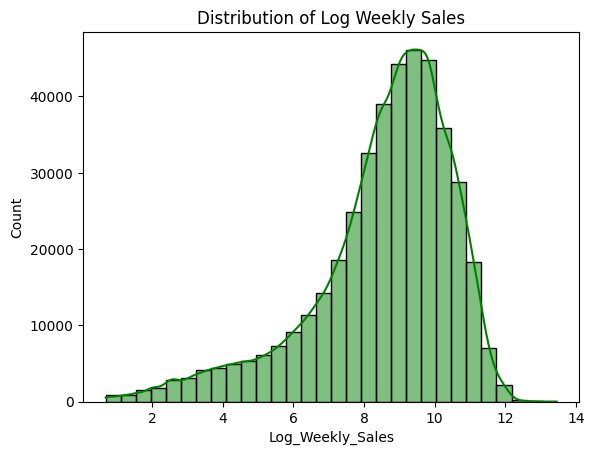

Skew : -1.165415315091697


In [ ]:
df['Log_Weekly_Sales'] = np.log1p(df['Weekly_Sales']+1)
sns.histplot(df['Log_Weekly_Sales'], bins=30, kde=True, color='green')
plt.title('Distribution of Log Weekly Sales')
plt.show()
print(f"Skew : {df['Log_Weekly_Sales'].skew()}")

The Weekly_Sales become  left-skewed so, we use another way.

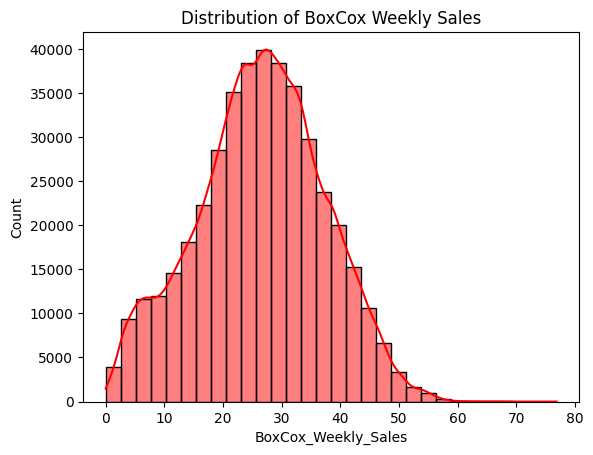

Skew : -0.0757618820203912


In [ ]:
from scipy.stats import boxcox
df['BoxCox_Weekly_Sales'], _ = boxcox(df['Weekly_Sales'] + 1)  # إضافة 1 لتجنب القيم الصفرية
sns.histplot(df['BoxCox_Weekly_Sales'], bins=30, kde=True, color='red')
plt.title('Distribution of BoxCox Weekly Sales')
plt.show()
print(f"Skew : {df['BoxCox_Weekly_Sales'].skew()}")

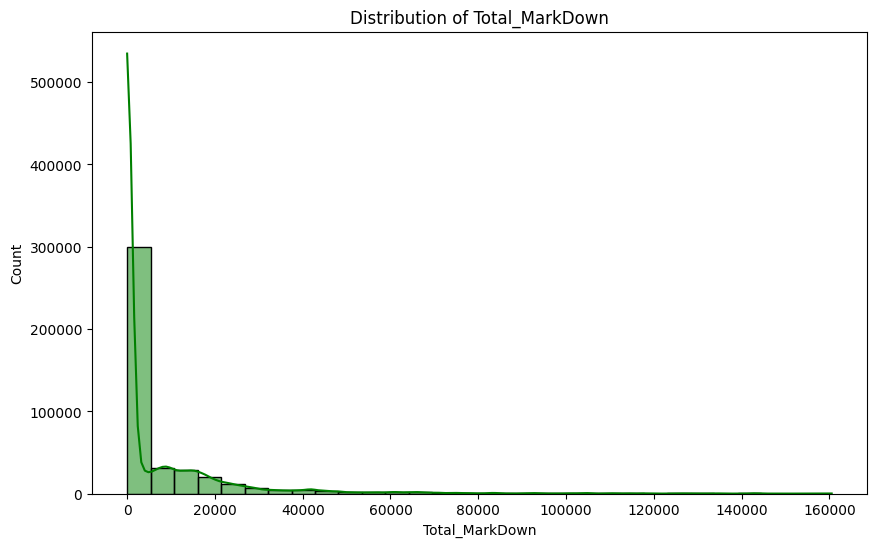

Skew : 3.259108889879835


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_MarkDown'], bins=30, kde=True, color='green')
plt.title('Distribution of Total_MarkDown')
plt.show()
print(f"Skew : {df['Weekly_Sales'].skew()}")

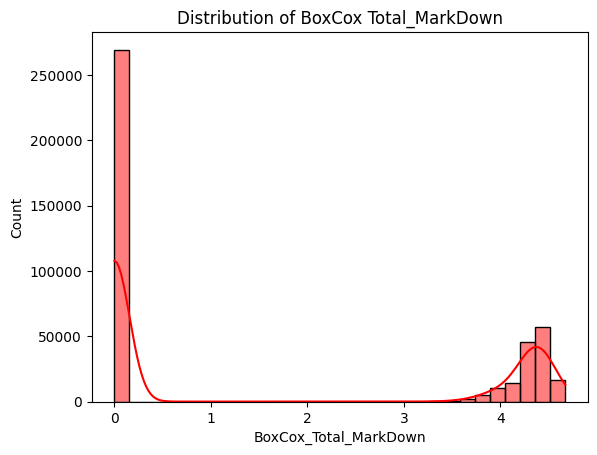

Skew : 0.5971198510439157


In [ ]:
from scipy.stats import boxcox
df['BoxCox_Total_MarkDown'], _ = boxcox(df['Total_MarkDown'] + 1)  # إضافة 1 لتجنب القيم الصفرية
sns.histplot(df['BoxCox_Total_MarkDown'], bins=30, kde=True, color='red')
plt.title('Distribution of BoxCox Total_MarkDown')
plt.show()
print(f"Skew : {df['BoxCox_Total_MarkDown'].skew()}")

<ipython-input-37-a8624fdcd4dd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='IsHoliday', y='Weekly_Sales',palette=['red','blue'])


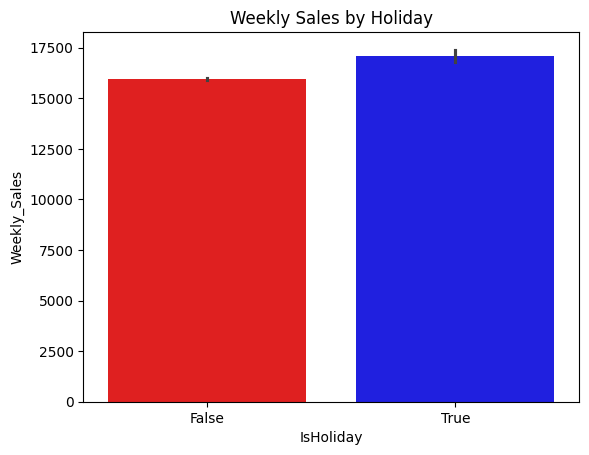

In [ ]:
sns.barplot(data=df,x='IsHoliday', y='Weekly_Sales',palette=['red','blue'])
plt.title('Weekly Sales by Holiday')
plt.show()

It is clear that holidays affect weekly sales, so we must learn more about them and know the extent of the impact of each holiday individually.

<Axes: xlabel='Christmas', ylabel='Weekly_Sales'>

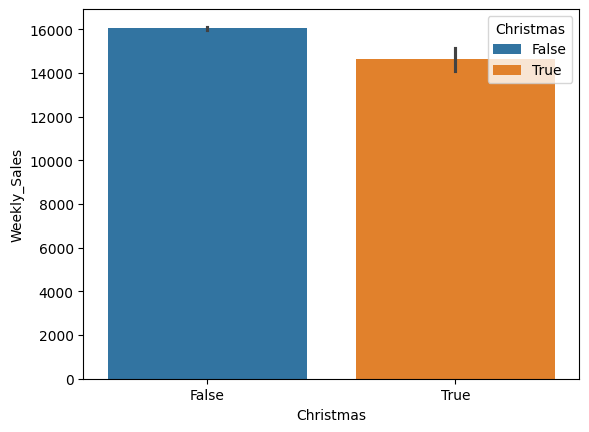

In [ ]:
sns.barplot(x='Christmas', y='Weekly_Sales',hue='Christmas', data=df) # Christmas holiday vs not-Christmas

<Axes: xlabel='Thanksgiving', ylabel='Weekly_Sales'>

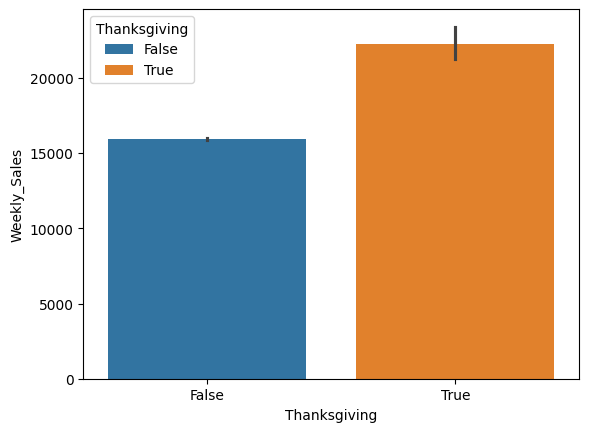

In [ ]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales',hue='Thanksgiving', data=df) # Thanksgiving holiday vs not-thanksgiving

<Axes: xlabel='Super_Bowl', ylabel='Weekly_Sales'>

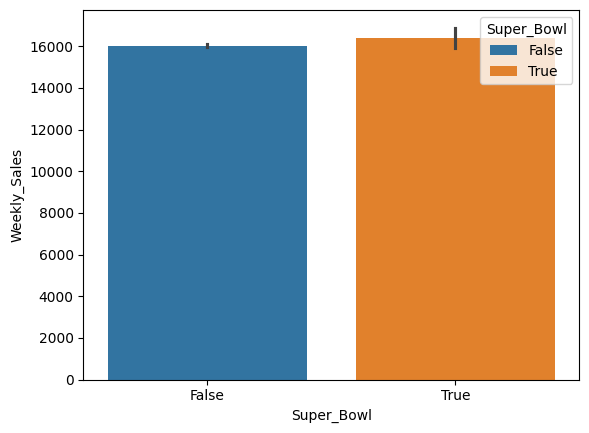

In [ ]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales',hue='Super_Bowl', data=df) # Super bowl holiday vs not-super bowl

<Axes: xlabel='Labor_Day', ylabel='Weekly_Sales'>

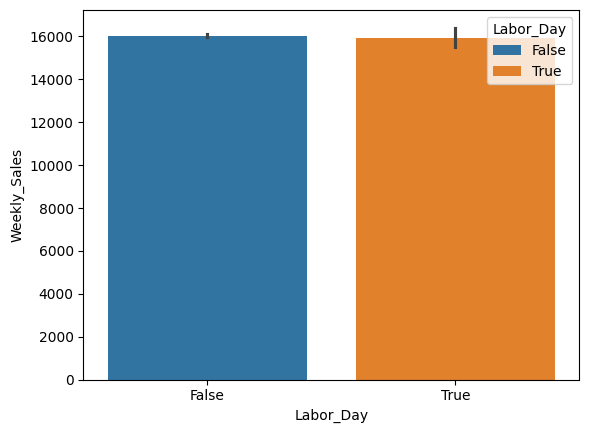

In [ ]:
sns.barplot(x='Labor_Day', y='Weekly_Sales',hue='Labor_Day', data=df) # Labor day holiday vs not-labor day

It is shown that for the graphs, Labor Day and Christmas do not increase weekly average sales. There is positive effect on sales in Super bowl, but the highest difference is in the Thanksgiving. I think, people generally prefer to buy Christmas gifts 1-2 weeks before Christmas, so it does not change sales in the Christmas week. And, there is Black Friday sales in the Thanksgiving week.

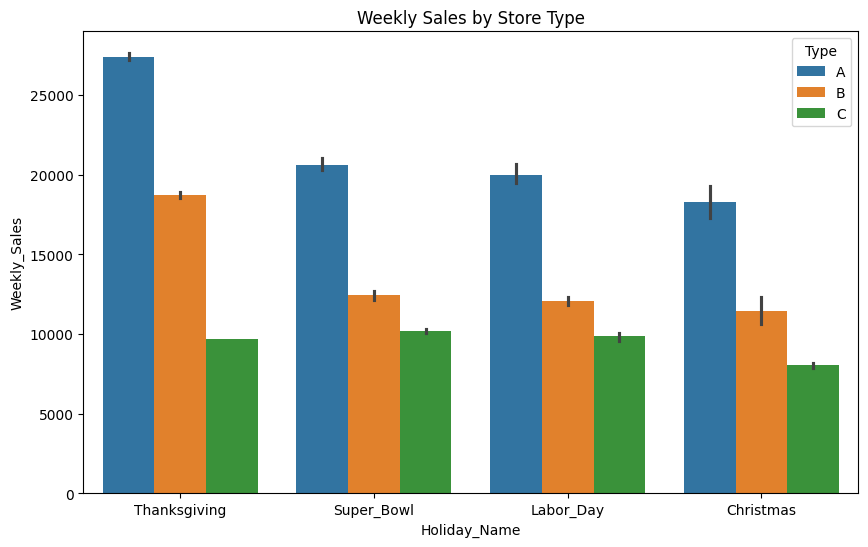

In [ ]:
holiday_sales = df[df['IsHoliday'] == True].groupby(['Date', 'Type'])['Weekly_Sales'].mean().reset_index()
holiday_sales['Holiday'] = holiday_sales['Date'].dt.strftime('%Y-%m-%d')

# Plotting avg wekkly sales according to holidays by types
labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
holiday_dates = ['2010-11-26', '2011-11-25', '2010-02-12', '2011-02-11', '2012-02-10', '2010-09-10', '2011-09-09', '2012-09-07', '2010-12-31', '2011-12-30']

holiday_sales = holiday_sales[holiday_sales['Holiday'].isin(holiday_dates)]
holiday_sales['Holiday_Name'] = holiday_sales['Date'].apply(lambda x: 'Thanksgiving' if x in pd.to_datetime(['2010-11-26', '2011-11-25'])
                                                     else 'Super_Bowl' if x in pd.to_datetime(['2010-02-12', '2011-02-11', '2012-02-10'])
                                                     else 'Labor_Day' if x in pd.to_datetime(['2010-09-10', '2011-09-09', '2012-09-07'])
                                                     else 'Christmas')
plt.figure(figsize=(10, 6))
sns.barplot(x='Holiday_Name', y='Weekly_Sales', hue='Type', data=holiday_sales, order=labels) # order the bars
plt.title('Weekly Sales by Store Type')
plt.show()

It is clear that store A has the best sales on all holidays.

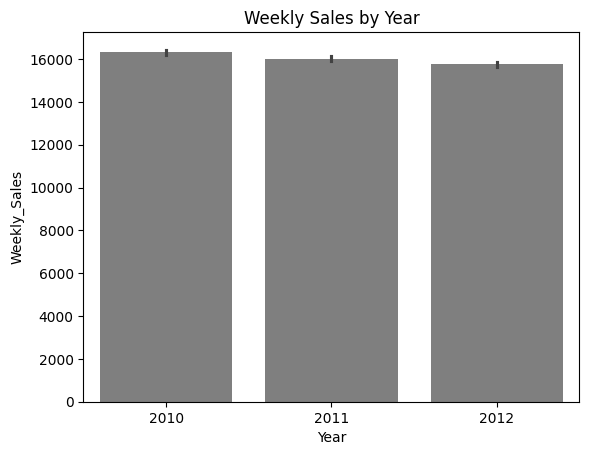

In [ ]:
sns.barplot(x='Year', y='Weekly_Sales', data=df , color='k' ,alpha = .5)
plt.title('Weekly Sales by Year')
plt.show()

Sales have been close over the past three years, but in 2010 there is a slight edge.

<ipython-input-45-6756472026ed>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month' ,y='Weekly_Sales',data=df,palette='husl')


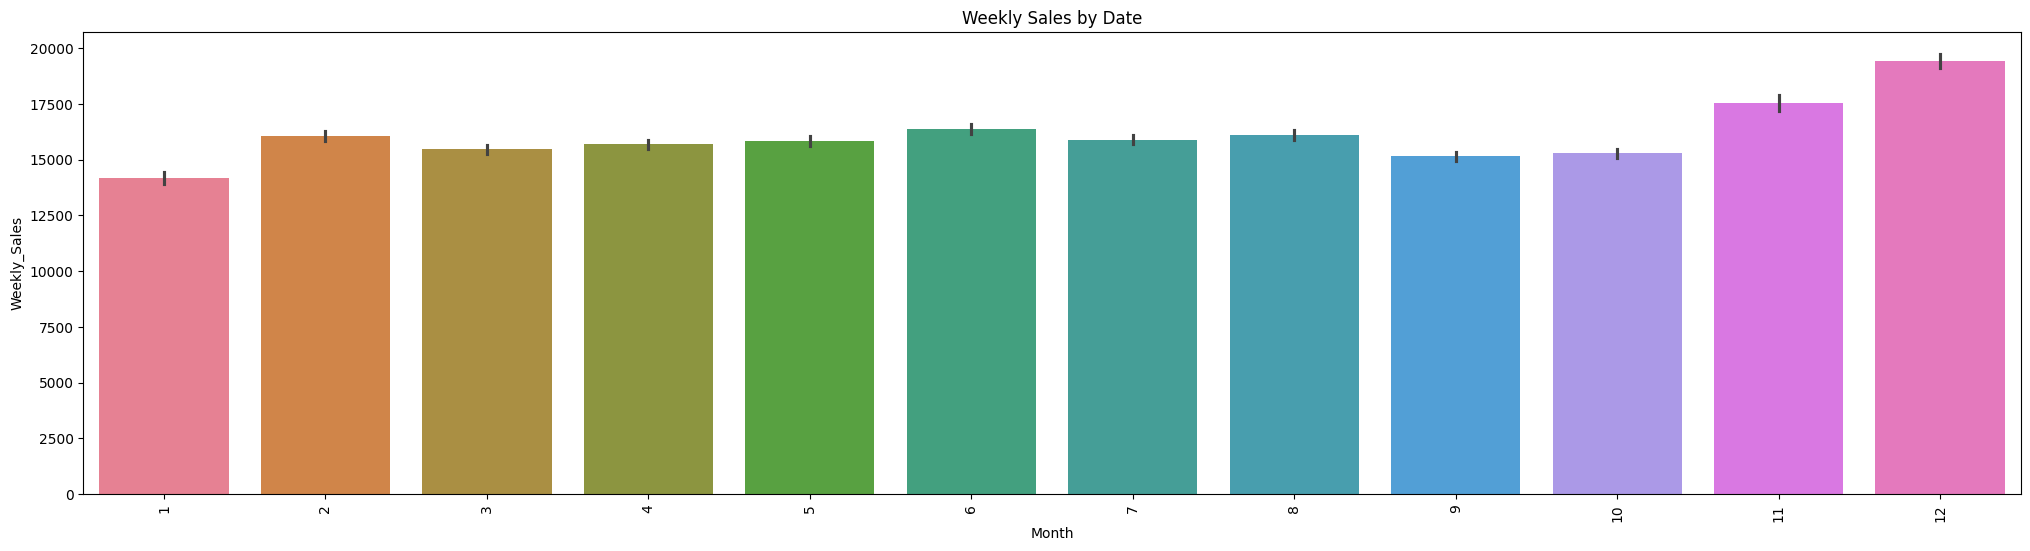

In [ ]:
plt.figure(figsize=(25, 6))
sns.barplot(x='Month' ,y='Weekly_Sales',data=df,palette='husl')
plt.xticks(rotation=90)
plt.title('Weekly Sales by Date')
plt.show()

It seems that December is the month with the most sales, and this is what we said, that the two weeks before Christmas have the most sales.

<ipython-input-46-e365c161b024>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Week' ,y='Weekly_Sales',data=df,palette='husl')


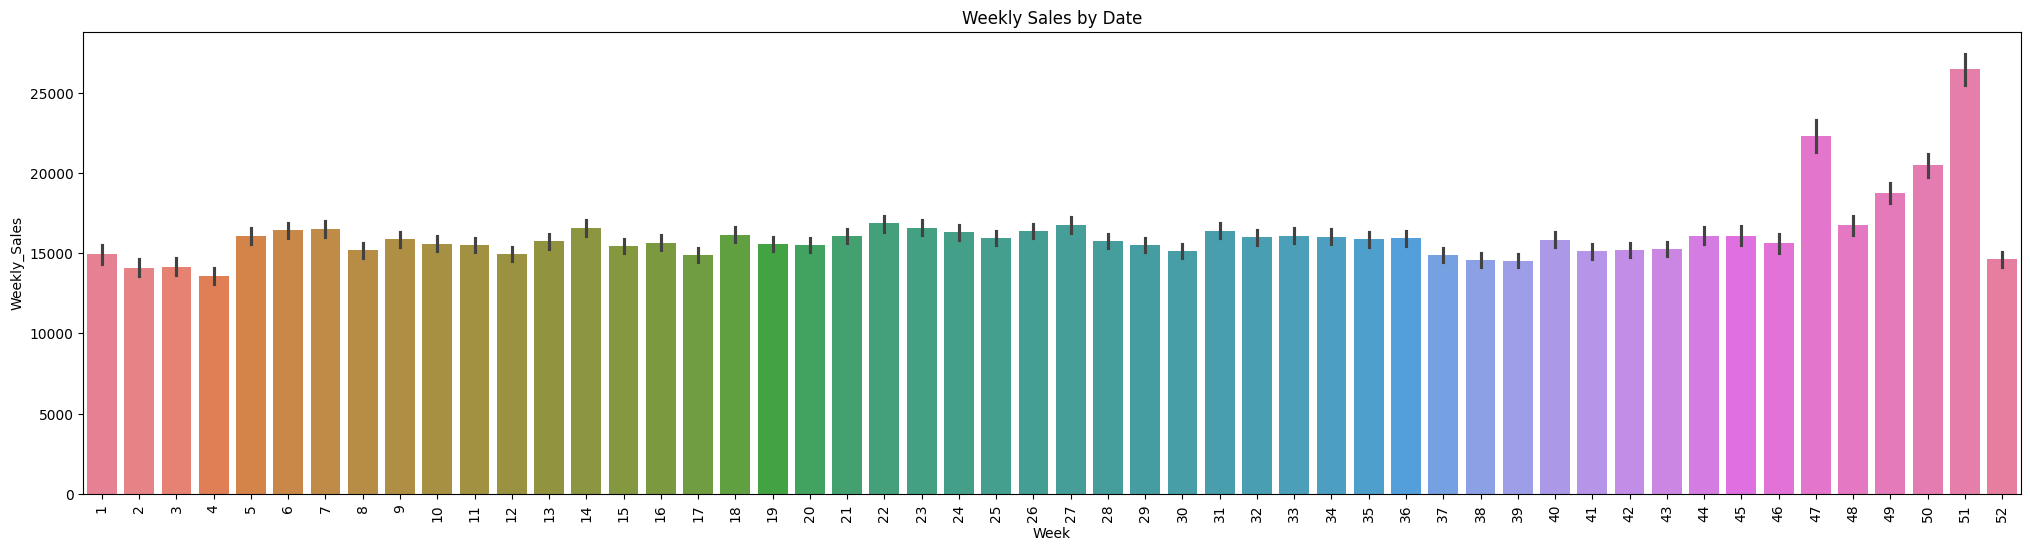

In [ ]:
plt.figure(figsize=(25, 6))
sns.barplot(x='Week' ,y='Weekly_Sales',data=df,palette='husl')
plt.xticks(rotation=90)
plt.title('Weekly Sales by Date')
plt.show()

The 51st week is the most sales specifically and it is definitely in December.

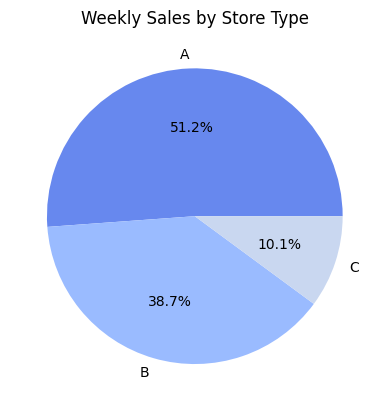

In [ ]:
# Calculate the frequency of each store type
type_counts = df['Type'].value_counts()

# Create the pie chart using the counts
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%',colors = sns.color_palette('coolwarm'))
plt.title('Weekly Sales by Store Type')
plt.show()

The sales ratio of store A exceeds the sales of stores C and B combined.

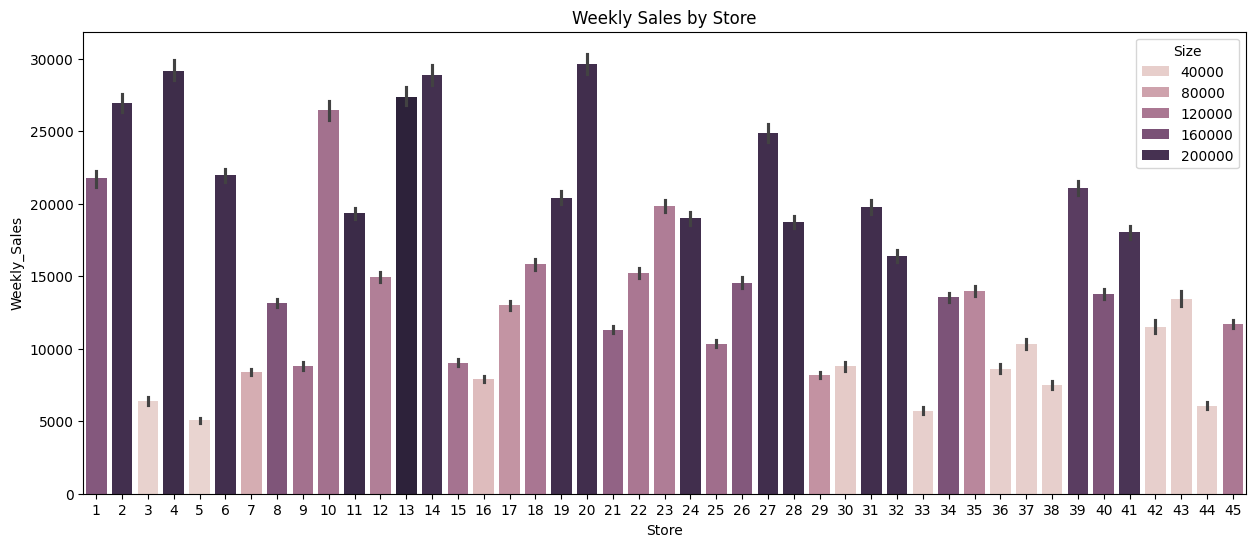

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Store', y='Weekly_Sales',hue='Size',data=df)
plt.title('Weekly Sales by Store')

plt.show()

Store **20** is the best-selling and one of the largest stores in terms of area.

<ipython-input-51-ff0854dbfbbd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dept', y='Weekly_Sales', data=df, palette='viridis', saturation=0.8)


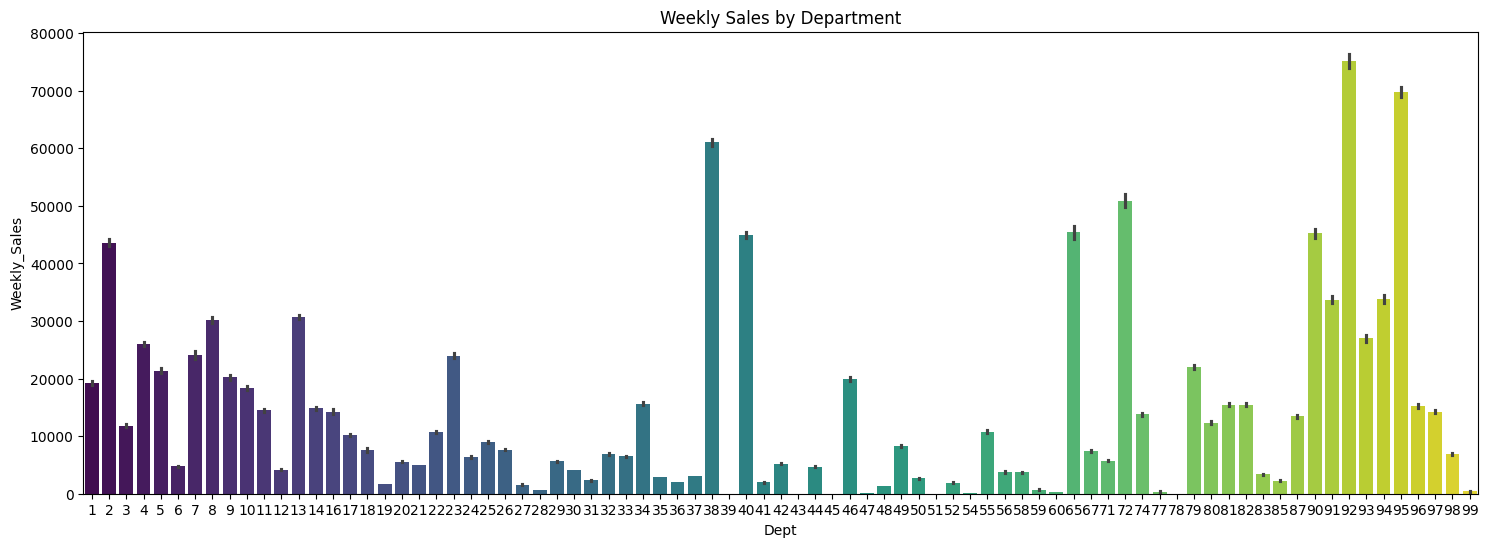

In [ ]:
plt.figure(figsize=(18, 6))
sns.barplot(x='Dept', y='Weekly_Sales', data=df, palette='viridis', saturation=0.8)
plt.title('Weekly Sales by Department')
plt.show()

department is the highest selling

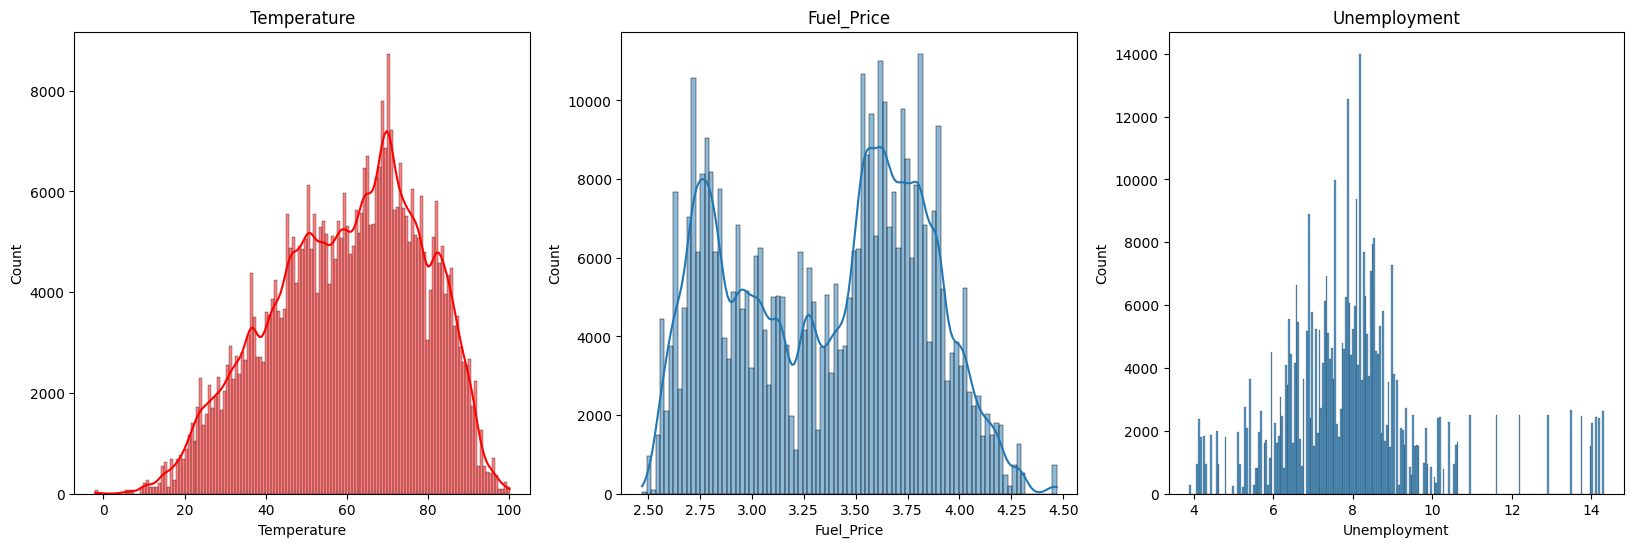

Skew_Temperature : -0.32125976868762773
Skew_Fuel_Price : -0.10465741356828552
Skew_Unemployment : 1.1838441280655665


In [ ]:
fig , ax = plt.subplots(1,3,figsize=(20,6))

sns.histplot(df['Temperature'],kde=True,color = 'r', ax=ax[0])
ax[0].title.set_text('Temperature')
sns.histplot(df['Fuel_Price'],kde=True, ax=ax[1])
ax[1].title.set_text('Fuel_Price')
sns.histplot(df['Unemployment'],kde=False, ax=ax[2])
ax[2].title.set_text('Unemployment')
plt.show()
print(f"Skew_Temperature : {df['Temperature'].skew()}")
print(f"Skew_Fuel_Price : {df['Fuel_Price'].skew()}")
print(f"Skew_Unemployment : {df['Unemployment'].skew()}")

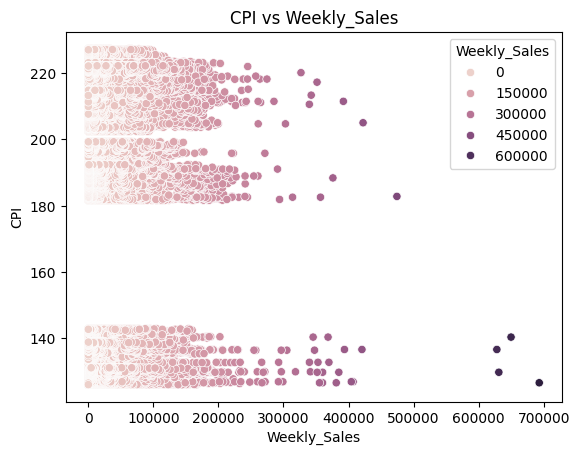

In [ ]:
sns.scatterplot(x=df['Weekly_Sales'], y = df['CPI'] ,hue =df['Weekly_Sales'] )
plt.title('CPI vs Weekly_Sales')
plt.show()

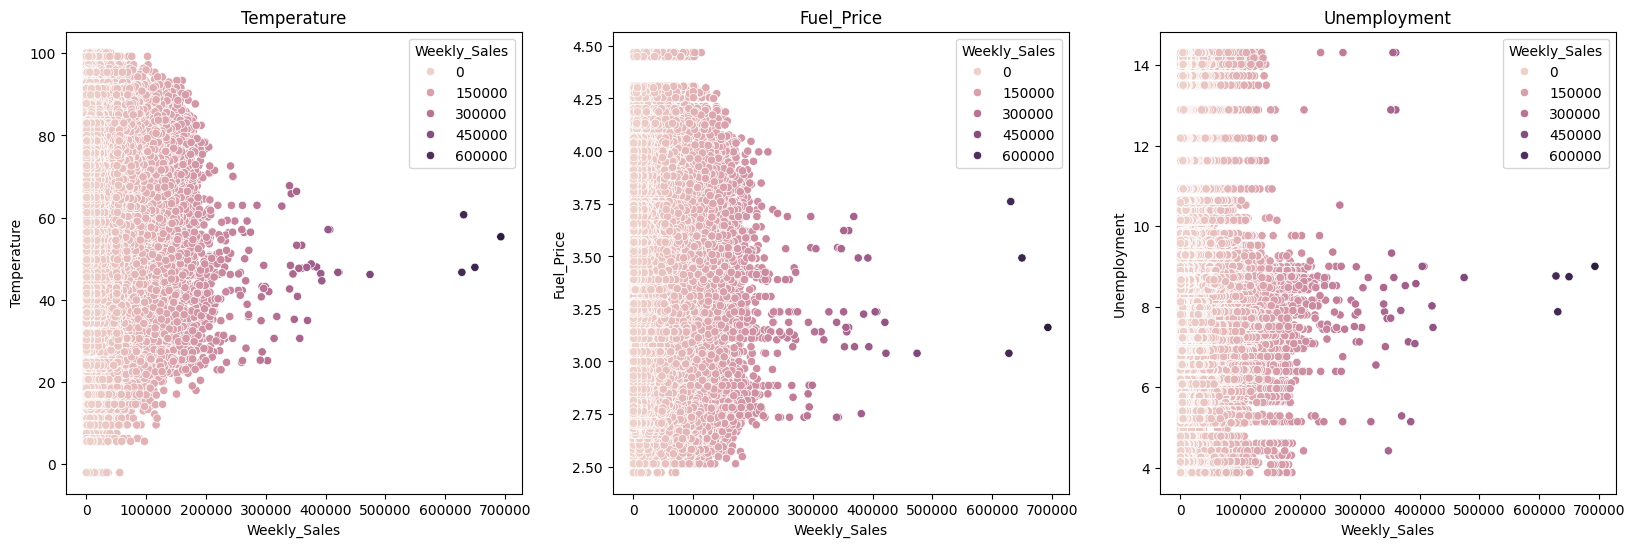

Skew_Temperature : -0.32125976868762773
Skew_Fuel_Price : -0.10465741356828552
Skew_Unemployment : 1.1838441280655665


In [ ]:
fig , ax = plt.subplots(1,3,figsize=(20,6))

sns.scatterplot(x=df['Weekly_Sales'], y = df['Temperature'],hue = df['Weekly_Sales'],color = 'r', ax=ax[0])
ax[0].title.set_text('Temperature')
sns.scatterplot(x=df['Weekly_Sales'], y = df['Fuel_Price'],hue = df['Weekly_Sales'], ax=ax[1])
ax[1].title.set_text('Fuel_Price')
sns.scatterplot(x=df['Weekly_Sales'], y = df['Unemployment'],hue = df['Weekly_Sales'], ax=ax[2])
ax[2].title.set_text('Unemployment')

plt.show()
print(f"Skew_Temperature : {df['Temperature'].skew()}")
print(f"Skew_Fuel_Price : {df['Fuel_Price'].skew()}")
print(f"Skew_Unemployment : {df['Unemployment'].skew()}")

From graphs, it is seen that there are no significant patterns between fuel_price, temperature, unemployment rate, fuel price vs weekly sales.

In [ ]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include=np.number).columns
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Type', 'Super_Bowl', 'Labor_Day', 'Thanksgiving', 'Christmas'], dtype='object')
Numerical Variables:
Index(['Store', 'Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Size', 'Year', 'Month', 'Week', 'Day',
       'Total_MarkDown', 'BoxCox_Weekly_Sales', 'BoxCox_Total_MarkDown'],
      dtype='object')


Text(0.5, 1.0, 'Correlation\xa0Matrix')

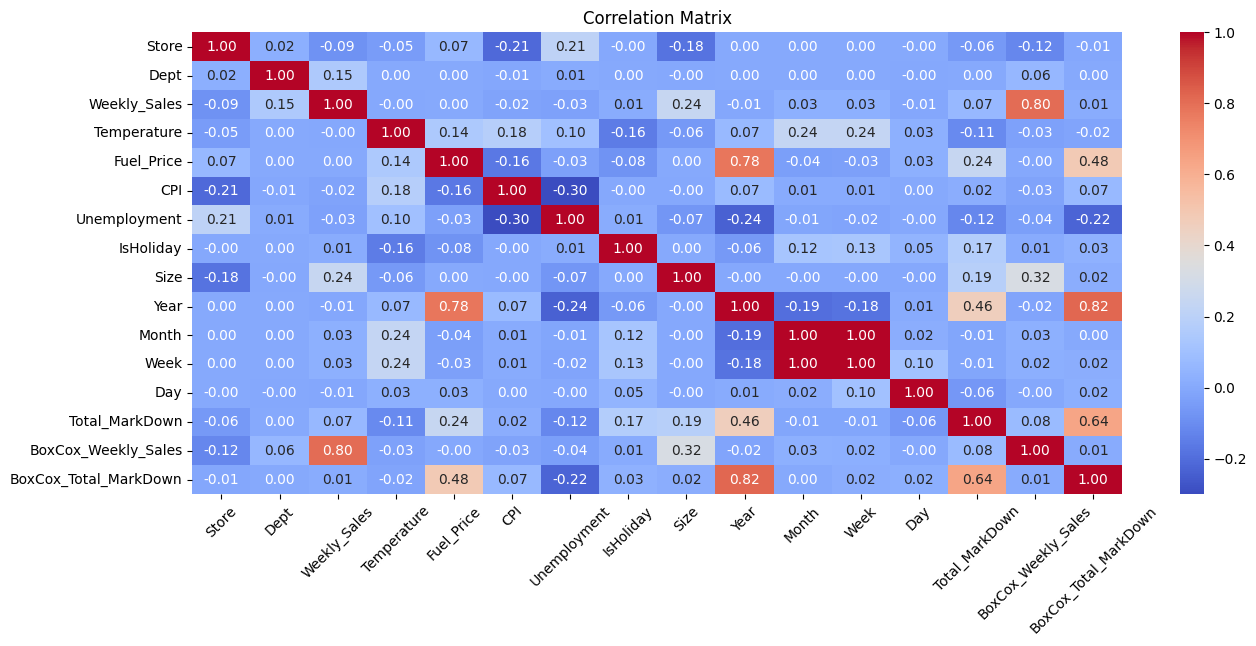

In [ ]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(15,6))
sns.heatmap(corr,annot=True,fmt = '.2f',cmap='coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
plt.title("Correlation Matrix")

# **⇒ Findings**

⊳ There are 45 stores and 81 department in data. Departments are not same in all stores.  
⊳Although department 72 has higher weekly sales values, on average department 92 is the best. It shows us, some departments has higher values as seasonal like Thanksgiving. It is consistant when we look at the top 5 sales in data, all of them belongs to 72th department at Thanksgiving holiday time.  
⊳ Although stores 10 and 35 have higher weekly sales values sometimes, in general average store 20 and store 4 are on the first and second rank. It means that some areas has higher seasonal sales.  
⊳ Stores has 3 types as A, B and C according to their sizes. Almost half of the stores are bigger than 150000 and categorized as A. According to type, sales of the stores are changing.   
⊳ As expected, holiday average sales are higher than normal dates   
⊳ Year 2010 has higher sales than 2011 and 2012. But, November and December sales are not in the data for 2012. Even without highest sale months, 2012 is not significantly less than 2010, so after adding last two months, it can be first.   
⊳ It is obviously seen that week 51 and 47 have higher values and 50-48 weeks follow them. Interestingly, 5th top sales belongs to 22th week of the year. This results show that Christmas, Thankgiving and Black Friday are very important than other weeks for sales and 5th important time is 22th week of the year and it is end of the May, when schools are closed. Most probably, people are preparing for holiday at the end of the May.   
⊳ January sales are significantly less than other months. This is the result of November and December high sales. After two high sales month, people prefer to pay less on January.  
⊳ CPI, temperature, unemployment rate and fuel price have no pattern on weekly sales.  
